<a href="https://colab.research.google.com/github/Forrestjohnson2000/Sea-Breeze-and-Shark-Analysis/blob/main/Final_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing on Merged Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next we do some slight cleaning of the data to make the data types more accurate.

In [ ]:
headers = [*pd.read_csv('merged_data.csv', nrows=1)]
#print(headers)

data = pd.read_csv("merged_data.csv", usecols = [c for c in headers if c != 'Unnamed: 0'], infer_datetime_format= True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.date = pd.to_datetime(data.date)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276824 entries, 0 to 276823
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     276824 non-null  datetime64[ns]
 1   hour     276824 non-null  int64         
 2   station  276824 non-null  object        
 3   tmpc     276824 non-null  float64       
 4   dwpc     276824 non-null  float64       
 5   relh     276824 non-null  float64       
 6   feel     276824 non-null  float64       
 7   drct     276824 non-null  float64       
 8   sped     276824 non-null  float64       
 9   p01i     276824 non-null  object        
 10  skyc1    276824 non-null  object        
 11  WDIR     276824 non-null  float64       
 12  WSPD     276824 non-null  float64       
 13  GST      276824 non-null  float64       
 14  PRES     276824 non-null  float64       
 15  ATMP     276824 non-null  float64       
 16  WTMP     276824 non-null  float64       
dtypes: datetim

In [ ]:
data.head()

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,WDIR,WSPD,GST,PRES,ATMP,WTMP
0,2013-01-01,0,HXD,8.0,7.0,93.40,46.40,0.0,0.0,0.00,CLR,120.0,2.0,7.296079,1017.408303,11.0,21.836225
1,2013-01-01,0,SUT,5.0,2.7,85.07,41.00,0.0,0.0,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225
2,2013-01-01,0,SUT,4.6,2.8,88.10,40.28,0.0,0.0,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225
3,2013-01-01,0,SUT,4.7,2.7,86.86,40.46,0.0,0.0,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225
4,2013-01-01,1,HXD,7.0,7.0,100.00,44.60,0.0,0.0,T,CLR,140.0,1.0,7.296079,1017.408303,11.0,21.836225


EDA of the data to see if it is normally distributed or not. Most variables are normally distributed, however **relh** is notably left skewed which will be taken into account in the future.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fb098b850>,
      dtype=object)

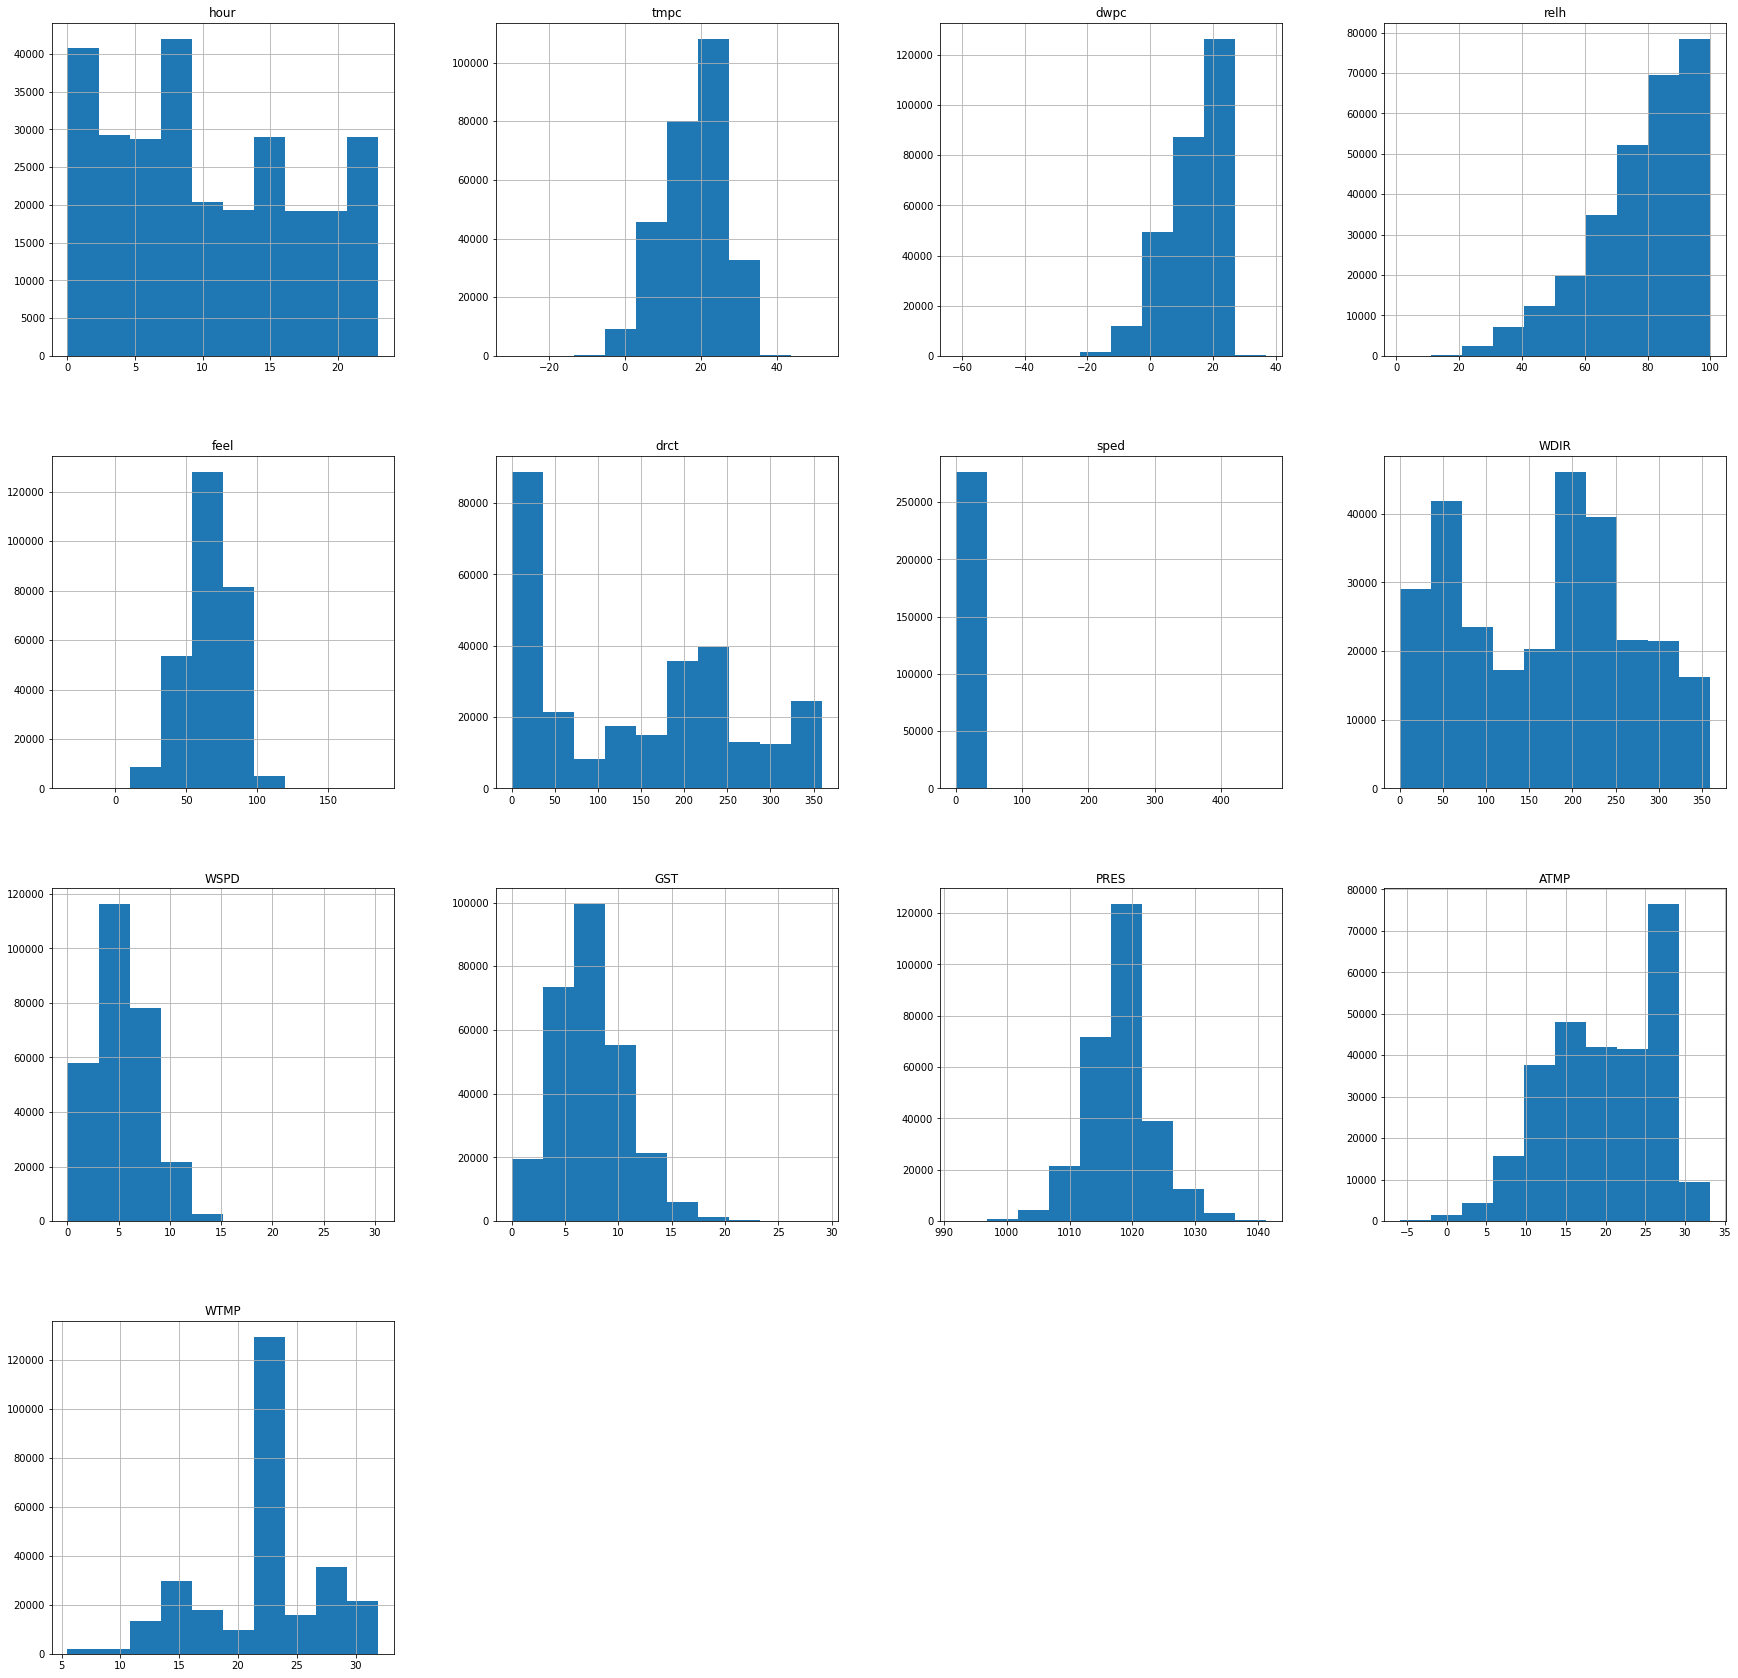

In [ ]:
data.loc[:, :"WTMP"].hist(figsize = (30,30))

In order to calculate seabreeze, we need another measure of pressure closer to the shore and the weather stations, so we included another dataset with the intention of only keeping pressure to be used later.

## Sea Breeze Data Creation 

### Calculation of Sea Breeze

Using multiple formulas found to calculate air density (), we created an estimated calculation for the condusiveness of a sea breeze at any given time. this originates from the report on sea breeze calculation that estimates that conduciveness of sea breeze can be calculated using air density *h*, overwater temperature *T*, and the gravitational constant. this variable is known as **SBI** and a value under 5 is an indication that weather factors are conducive to produce a sea breeze. We are still working on perfecting these variables and are not quite sure how accurate the final results are yet based on the description of **SBI**.

In [ ]:
Saturated_vapor_pressure = 6.1078 * (10**((7.5*(data.tmpc))/(data.tmpc + 273.15)))
vapor_pressure = Saturated_vapor_pressure * (data.relh)
dry_pressure = data.PRES - vapor_pressure

air_density = dry_pressure/(287.058*(data.tmpc+273.15)) + vapor_pressure/(461.495*(data.tmpc+273.15))

SBI = 19.6*air_density/(data.ATMP+273.15)
SBI = SBI*10000
#print(data.ATMP.describe())
print(SBI.describe())

SBI[SBI >= 0]

count    276824.000000
mean          3.539338
std           2.217108
min         -14.177925
25%           1.552144
50%           3.351563
75%           5.370722
max           9.777402
dtype: float64


11004    -0.036947
11008    -0.036947
11009    -0.036947
12878    -0.087038
12879    -0.087038
            ...   
276446   -0.109697
276447   -0.077328
276482   -0.157392
276483   -0.163265
276484   -0.138169
Length: 3618, dtype: float64

In [ ]:
data["SBI"] = SBI
sea_breeze_data = data
sea_breeze_data
sea_breeze_data.to_csv("sbd.csv")

,Unnamed: 0,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,WDIR,WSPD,GST,PRES,ATMP,WTMP,SBI
0,53810,2013-01-01,0,HXD,8.00,7.00,93.40,46.40,0.0,0.00,0.00,CLR,120.0,2.0,7.296079,1017.408303,11.0,21.836225,5.683124
1,53810,2013-01-01,0,SUT,5.00,2.70,85.07,41.00,0.0,0.00,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225,6.475055
2,53810,2013-01-01,0,SUT,4.60,2.80,88.10,40.28,0.0,0.00,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225,6.459742
3,53810,2013-01-01,0,SUT,4.70,2.70,86.86,40.46,0.0,0.00,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225,6.476219
4,53811,2013-01-01,1,HXD,7.00,7.00,100.00,44.60,0.0,0.00,T,CLR,140.0,1.0,7.296079,1017.408303,11.0,21.836225,5.677941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276819,7967,2020-12-16,10,SUT,7.78,6.00,88.51,39.82,20.0,13.80,0,OVC,342.0,10.6,14.700000,1014.600000,9.7,15.300000,5.885612
276820,7967,2020-12-16,10,SUT,7.78,6.00,88.51,41.36,20.0,9.20,0,OVC,342.0,10.6,14.700000,1014.600000,9.7,15.300000,5.885612
276821,8171,2020-12-24,22,SUT,18.72,17.61,93.26,65.70,170.0,12.65,0,SCT,203.0,8.9,14.400000,1005.200000,17.5,14.300000,2.844736
276822,8171,2020-12-24,22,SUT,18.78,17.61,92.93,65.80,160.0,10.35,0,SCT,203.0,8.9,14.400000,1005.200000,17.5,14.300000,2.845321


In [ ]:
sea_breeze_data = pd.read_csv("sbd.csv")
sea_breeze_data.date.value_counts

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method IndexOpsMixin.value_counts of 0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
276819    2020-12-16
276820    2020-12-16
276821    2020-12-24
276822    2020-12-24
276823    2020-12-24
Name: date, Length: 276824, dtype: object>

One important point Joe Merchant mentioned was the peak periods of shark attacks occurring from 2pm to 4pm. Knowing this, we grouped the data on day and hour for the hours of 14, 15, and 16 (2-4 pm) and made it a new dataset to prepare for our next variable addition.


In [ ]:
df1 = sea_breeze_data[sea_breeze_data["hour"] == 14]
df1 = df1.groupby(["date"], as_index = False).mean()
df2 = sea_breeze_data[sea_breeze_data["hour"] == 15]
df2 = df2.groupby(["date"], as_index = False).mean()
df3 = sea_breeze_data[sea_breeze_data["hour"] == 16]
df3 = df3.groupby(["date"], as_index = False).mean()

df4 = df1.append(df2)
df5 = df4.append(df3)

df5

df5.to_csv("sea_breeze_hours.csv")

Reading in Shark data from Dr. Thompson's previous analysis of shark attacks. Our goal is only to take the **AttackCat** variable as the data only intersects a third of our original merged data. This way we can keep all the useful values from the weather stations and SBI and compare to whether or not a shark attack occurs. This will be very useful as our target in future modelling.

We left joined on our original data on date, making all values where shark attacks didn't occur nan's. These were then altered to be *0* to indicate a shark attack did not occur on that day.

In [ ]:
sb_hours = pd.read_csv("sea_breeze_hours.csv")
sharkdata = pd.read_csv("sharkdata.csv", usecols= ["Attack", "Date"])

sb_hours["date"] = pd.to_datetime(sb_hours["date"])

sharkdata["Attack"] = sharkdata["Attack"].astype('category')
sharkdata["AttackCat"] = sharkdata["Attack"].cat.codes
sharkdata["Date"] = pd.to_datetime(sharkdata["Date"])

sb_shark = sb_hours.merge(sharkdata, how = "left", left_on = "date", right_on = "Date")

sb_shark = sb_shark.drop(columns = ["Date", "Attack"])

sb_shark.AttackCat = sb_shark.AttackCat.replace(np.nan, 0) 

In [ ]:
#See how many values are attacks vs. not in the data
sb_shark.AttackCat.value_counts()

0.0    7307
1.0      95
Name: AttackCat, dtype: int64

In [ ]:
sb_shark.date.min()

Timestamp('2013-01-01 00:00:00')

We then cut the data to only include the years that shark attacks were recorded (from Dr. Thompson's data).

In [ ]:

dtrange = pd.date_range(start = "2013-01-01", end = "2016-12-31")
#[for date in dtrange]
shark_train = sb_shark[(sb_shark.date > '2013-01-01') & (sb_shark.date < '2016-12-31')]

shark_train = shark_train.drop(columns = ["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1"])

shark_train

,date,hour,tmpc,dwpc,relh,feel,drct,sped,WDIR,WSPD,GST,PRES,ATMP,WTMP,SBI,AttackCat
1,2013-01-02,14.0,12.3000,11.7750,96.6475,54.1400,67.500000,8.0500,250.0,4.0,7.296079,1017.408303,13.3,21.836225,4.547025,0.0
2,2013-01-03,14.0,5.7250,4.7000,93.1225,41.4400,22.500000,2.0125,80.0,5.0,7.296079,1017.408303,10.8,21.836225,6.092861,0.0
3,2013-01-05,14.0,4.6750,-2.8750,58.1550,34.8900,25.000000,8.3375,50.0,6.0,7.296079,1017.408303,9.2,21.836225,7.273592,0.0
4,2013-01-06,14.0,8.1000,6.3000,88.4150,46.5800,0.000000,0.0000,350.0,5.0,7.296079,1017.408303,10.7,21.836225,5.821537,0.0
5,2013-01-07,14.0,7.5500,1.1000,63.8100,40.7975,25.000000,9.4875,50.0,8.0,7.296079,1017.408303,10.4,21.836225,6.718124,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,2016-12-26,16.0,15.1525,11.6250,80.1200,59.2750,32.500000,6.3250,38.0,6.6,8.300000,1032.100000,13.7,13.900000,4.738069,0.0
5992,2016-12-27,16.0,18.9300,17.5000,91.5700,66.0750,250.000000,11.7875,269.0,0.8,1.900000,1025.500000,13.7,13.900000,3.090149,0.0
5993,2016-12-28,16.0,18.2925,8.4025,54.2350,64.9250,48.792615,6.3250,270.0,1.8,2.400000,1021.500000,15.0,14.400000,5.244294,0.0
5994,2016-12-29,16.0,17.6800,16.2625,91.6275,63.8250,222.500000,12.3625,225.0,8.3,10.900000,1012.900000,16.2,14.300000,3.314484,0.0


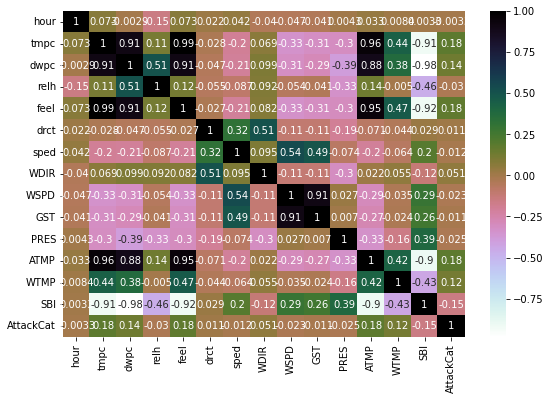

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(shark_train.corr(),annot=True,cmap='cubehelix_r')
plt.show()

After looking at the correlation matrix, we removed the variables that had a > 0.5 correlation. These variables were **tmpc**, **ATMP**, **dwpc**, **feel**, **relh**, and **GST**. We created another correlation matrix to view the remaining variables. We kept both **WDIR** and **drct** as well as **sped** and **WSPD** despite their high correlation because of the importance of having a land and sea measurement of wind direction a wind speed.

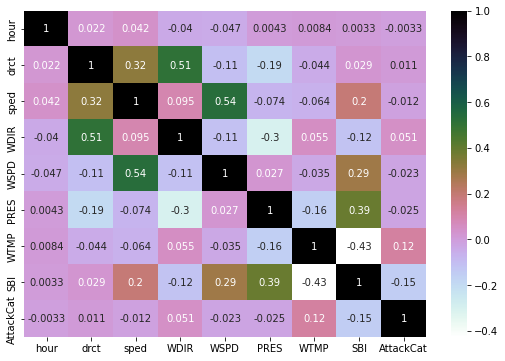

In [ ]:
st = shark_train.drop(columns = ["tmpc", "ATMP", "dwpc", "feel", "relh", "GST"])

plt.figure(figsize=(9,6))
sns.heatmap(st.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [ ]:
st.to_csv("prepped_data.csv")